In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
df = pd.read_csv('google_books_dataset.csv',encoding = 'latin1')

print(f'Первые пять строк: \n {df.head()}')
print(f'Последние пять строк: \n {df.tail()}')

print(f'Информация о датасете: \n {df.info()}')
print(df.dtypes)
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
numeric_cols = ['page_count', 'average_rating', 'ratings_count']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df['publish_year'] = df['published_date'].dt.year

Первые пять строк: 
         book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers   

In [73]:
print(f'Количество пропусков по столбцам: \n {df.isnull().sum()}')
df = df.dropna(subset=['title', 'authors'])

text_fill_cols = ['publisher', 'categories', 'description']
for col in text_fill_cols:
    if col in df.columns:
        if pd.api.types.is_categorical_dtype(df[col]):
            if 'Unknown' not in df[col].cat.categories:
                df[col] = df[col].cat.add_categories('Unknown')
        df[col] = df[col].fillna('Unknown')

if 'page_count' in df.columns:
    df['page_count'] = df['page_count'].fillna(df['page_count'].median())

rating_cols = ['average_rating', 'ratings_count']
for col in rating_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

df['publish_year'] = df['publish_year'].fillna(0).astype(int)

key_cols = ['title', 'authors', 'published_date']
df = df.drop_duplicates(subset=key_cols, keep='first')

Количество пропусков по столбцам: 
 book_id                0
title                  8
subtitle            9164
authors             3525
publisher           8057
published_date      9093
description         6796
page_count           214
categories          2452
average_rating     14290
ratings_count          0
language               0
preview_link           0
info_link              0
isbn_13             7764
isbn_10             8026
list_price         12204
currency           12204
buyable                0
search_category        0
thumbnail            669
publish_year        9093
dtype: int64


/tmp/ipython-input-3800083524.py:7: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[col]):


In [74]:
print(df.describe())

for col in df.select_dtypes(include=['category', 'object']).columns:
    print(f"\n{col}: {df[col].nunique()} уникальных значений")
    print(df[col].value_counts().head(10))

corr_matrix = df.select_dtypes(include=[np.number]).corr()
print(corr_matrix)

                      published_date    page_count  average_rating  \
count                           5954  11213.000000    11213.000000   
mean   2016-02-16 00:23:56.614040832    394.396326        0.282395   
min              1928-04-01 00:00:00      0.000000        0.000000   
25%              2012-08-14 06:00:00    178.000000        0.000000   
50%              2017-07-27 00:00:00    316.000000        0.000000   
75%              2021-06-20 12:00:00    500.000000        0.000000   
max              2026-07-02 00:00:00   7768.000000        5.000000   
std                              NaN    381.981674        1.069747   

       ratings_count       isbn_13   list_price  publish_year  
count   11213.000000  7.198000e+03  2904.000000  11213.000000  
mean        0.502542  9.782406e+12    47.751698   1070.280389  
min         0.000000  9.780002e+12     0.000000      0.000000  
25%         0.000000  9.780765e+12     9.950000      0.000000  
50%         0.000000  9.781435e+12    19.500000  

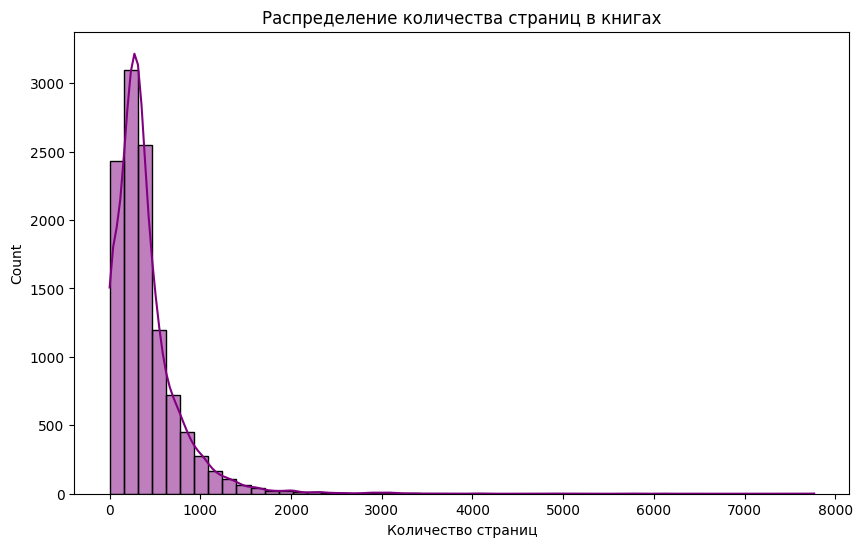

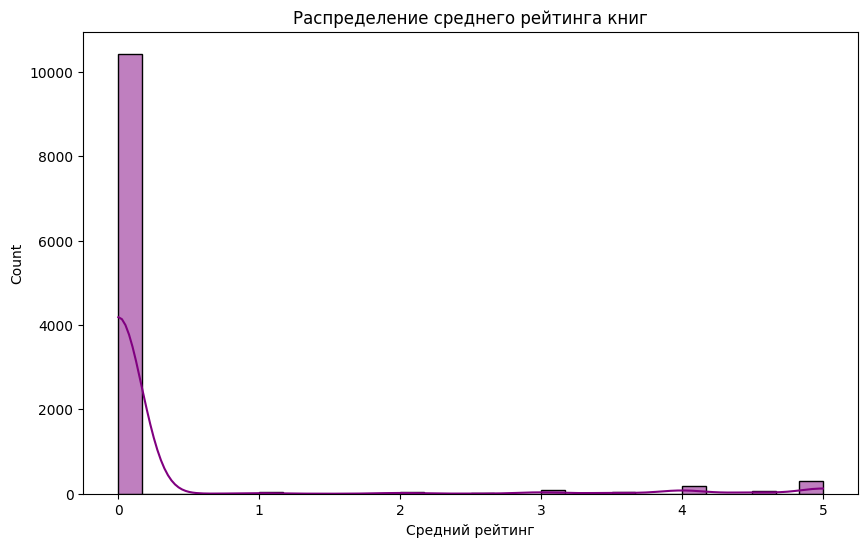

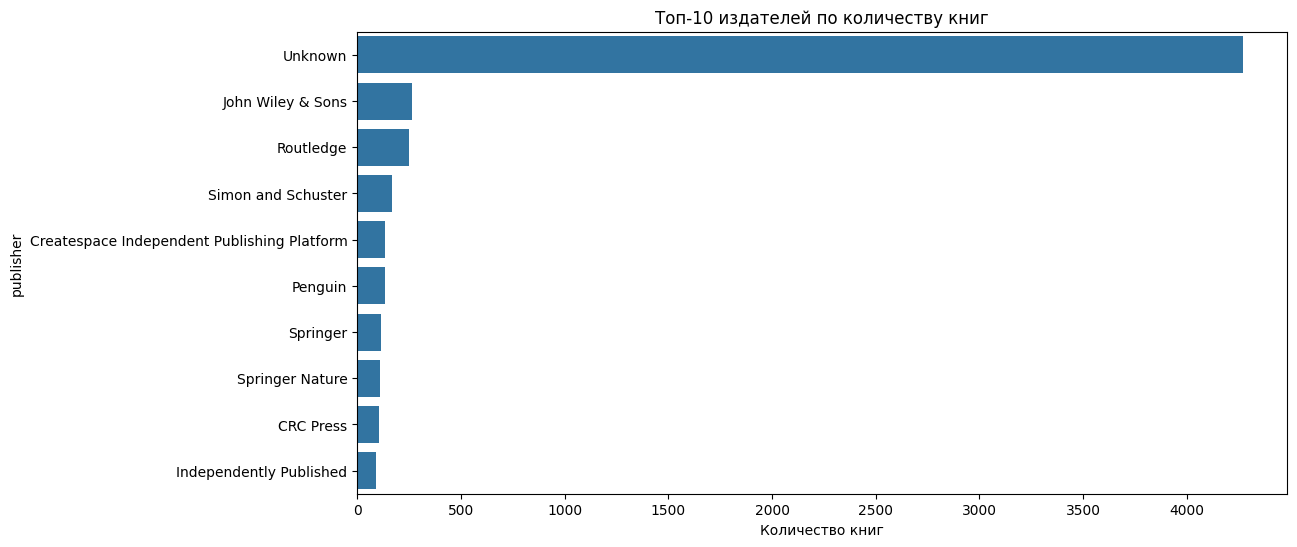

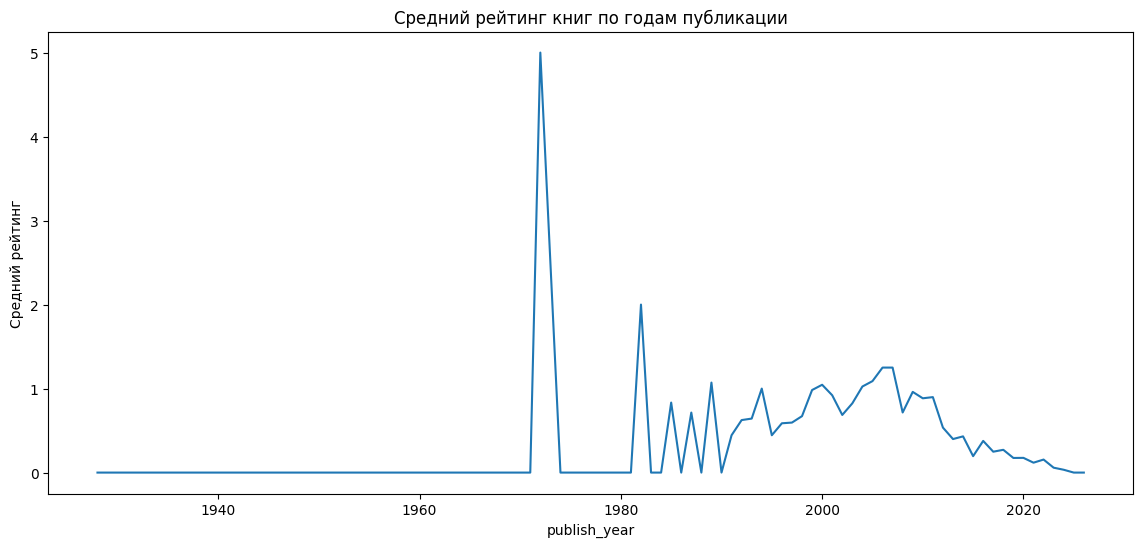

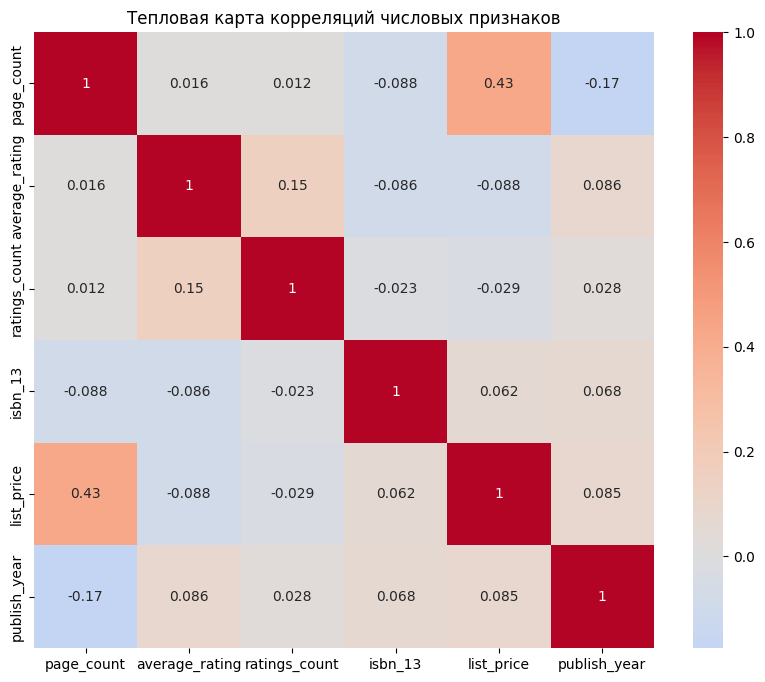

In [77]:
# 1. Гистограмма распределения количества страниц
plt.figure(figsize=(10, 6))
sb.histplot(df['page_count'], bins=50, kde=True, color='purple')
plt.title('Распределение количества страниц в книгах')
plt.xlabel('Количество страниц')
plt.show()

# 2. Гистограмма среднего рейтинга
plt.figure(figsize=(10, 6))
sb.histplot(df['average_rating'], bins=30, kde=True, color='purple')
plt.title('Распределение среднего рейтинга книг')
plt.xlabel('Средний рейтинг')
plt.show()

# 3. Столбчатая диаграмма: Топ-10 издателей по количеству книг
top_publishers = df['publisher'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sb.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Топ-10 издателей по количеству книг')
plt.xlabel('Количество книг')
plt.show()

# 4. Линейный график: Средний рейтинг по годам публикации (после 1900)
year_rating = df[df['publish_year'] > 1900].groupby('publish_year')['average_rating'].mean()
plt.figure(figsize=(14, 6))
year_rating.plot(kind='line')
plt.title('Средний рейтинг книг по годам публикации')
plt.ylabel('Средний рейтинг')
plt.show()

# 5. Heatmap корреляций
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций числовых признаков')
plt.show()

In [79]:
# Среднее и медиана рейтинга по годам публикации
print("Средний и медианный рейтинг по годам (после 1950):")
year_stats = df[df['publish_year'] > 1950].groupby('publish_year')['average_rating'].agg(['mean', 'median', 'count'])
display(year_stats.tail(20))

# Подсчёт количества книг по издателям (топ-15)
print("\nТоп-15 издателей по количеству книг:")
publisher_count = df['publisher'].value_counts().head(15)
display(publisher_count)

Средний и медианный рейтинг по годам (после 1950):


,mean,median,count
publish_year,,,
2007,1.250000,0.0,100
2008,0.715447,0.0,123
2009,0.960606,0.0,165
2010,0.884393,0.0,173
2011,0.898352,0.0,182
2012,0.535714,0.0,252
2013,0.399177,0.0,243
2014,0.431095,0.0,283
2015,0.195502,0.0,289



Топ-15 издателей по количеству книг:


,count
publisher,
Unknown,4270
John Wiley & Sons,263
Routledge,252
Simon and Schuster,166
Createspace Independent Publishing Platform,133
Penguin,132
Springer,115
Springer Nature,110
CRC Press,103
